<a href="https://colab.research.google.com/github/bernieee/SIRIUS/blob/master/AI_for_Med_image_analysis/Practicum1_ML_frameworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is the first practical task of Sirius summer school "Applying AI for Med image analysis". 
Practical tasks take form of jupyter notebook with example code in the begging and some tasks in the end. Please, provide your solution in form of python code. Read hints, google a lot, don't hesitate to ask us directly and most importantly - 
<span style="color:blue">have fun</span>.

**Topic**: ML frameworks, data preprocessing

**To submit**: New version of the notebook, with your code. 

## ML frameworks:
### - Tensorflow
### - High level tensorflow (aka Keras)
### - Pytorch
### - Other dead frameworks

![image.png](https://cv-tricks.com/wp-content/uploads/2018/05/Karpathy-Pytorch-Tweet.png)

Please finish the folowing tutorials to get familiar with pytorch (we will use it later in course):
- https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py
- https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
- https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Important part of Pytorch training cycle is Dataset class, which provides way to load data into your model. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/Sirius 2020/"

In [9]:
#let's install pydicom, which is a library to operate dicom files and their content
!pip install pydicom 

     |████████████████████████████████| 35.5MB 120kB/s 


In [4]:
!pip install torch===1.5.1 torchvision===0.6.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 753.2MB 23kB/s 
     |████████████████████████████████| 6.6MB 17.9MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [5]:
import torch
from torch.utils.data import Dataset
import numpy as np

class MyDataset(Dataset):
    def __init__():
        #do some initialization
        pass
    
    def __len__(self):
        #calculate length of your dataset here
        return 
    
    def __getitem__(self, index):
        #code to load sample with given index
        return

For example particular (although not very usefull)  implementation to load number. 

In [6]:
class MyNumberDataset(Dataset):
    """
    Return numbers from given range
    """
    def __init__(self,min_number=0,max_number=100):
        self.numbers = np.arange(min_number,max_number)
        pass
    
    def __len__(self):
        return len(self.numbers)
    
    def __getitem__(self, index):
        return torch.tensor(self.numbers[index])

my_dataset = MyNumberDataset(0,10)
print(my_dataset[0])
print(my_dataset[5])

tensor(0)
tensor(5)


### Two kinds of data preprocessing:
#### - Transforms - Invariant preprocessing always applied to image (for example, noise reduction, convertion to proper size)
#### - Augmentations - Probabilistic changes, used in training to add variation to images. 
#### let's see how they work

https://albumentations.readthedocs.io/en/latest/examples.html

In [7]:
!pip install albumentations

     |████████████████████████████████| 634kB 2.7MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=224b0c7feb2a7c507dff0e2a14592a3ca7e4c1cc35c0cb25a00323bcb2d643e4
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [10]:
import pydicom 
from matplotlib import pyplot as plt
from albumentations import (
    HorizontalFlip, VerticalFlip, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
     GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)
dicom_example = pydicom.read_file(path + "data/IM_00020_ano.dcm")
img = dicom_example.pixel_array.copy()
img = ((img-img.min()) / (img.max()-img.min()) * 255).astype(np.uint8)

transforms = Compose([VerticalFlip(),GridDistortion(distort_limit=1),MotionBlur(blur_limit=10,p=1)])

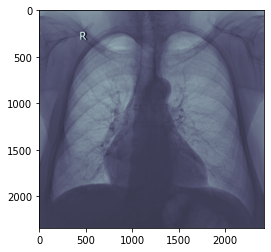

In [13]:
transformed = transforms(image=img)['image']
#Each time you run this cell you will get different result
plt.imshow(transformed,cmap="bone")

## **Task 1:**
- Theory: It's great to have convinient dataset class to train your model. 
- Given: Images from data\MedMnist folder
- Do: Create dataset class, which supports transformations. Use folder names to create classes.  


In [ ]:
!unzip '/content/drive/My Drive/Sirius 2020/data/MedMnist.zip'

In [21]:
import os

In [43]:
class TransformationDataset(Dataset):

    def __init__(self, root, transform):
        self.transform = transforms
        self.images = self.__image_paths__(root)
        self.labels = self.__image_labels__(root)

        pass

    def __image_paths__(self, root):
        folder = []
        image_paths = [] 

        for name in os.walk('MedMnist'):
          folder.append(name)

        for address, dirs, files in folder:
          for name in files:
            image_paths.append(address + '/' + name)
        
        return image_paths

    def __image_labels__(self, root):
        labels = list(os.walk('MedMnist'))[0][1]
        labels_dict = {labels[i] : i for i in range(len(labels))}

        return labels_dict
                                            
    def __len__(self):
        return len(self.images)

    def __get_image__(self, image_path):
        image_file = pydicom.read_file(image_path)
        image_array = image_file.pixel_array.copy()
        image_array = ((image_array-image_array.min()) / (image_array.max()-image_array.min()) * 255).astype(np.uint8)

        return image_array

    def __get_label__(self, image_path):
        label = list(image_path.split('/'))[1]

        return self.labels[label]
        
    def __get_item__(self, index):
        image_path = self.images[index]

        image = self.__get_image__(image_path)
        image = self.transform(image=image)['image']

        label = self.__get_label__(image_path)

        image = torch.tensor(image)
        label = torch.tensor(label)
  
        return {'image':image, 'label':label}

In [46]:
dataset = TransformationDataset('MedMnist', transforms)

dataset[0][1]

NotImplementedError: ignored